,Description,Value
0,session_id,4985
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(100000, 10)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


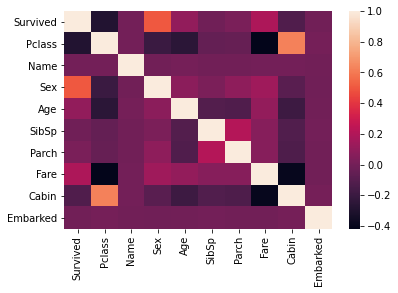

In [10]:
%matplotlib inline
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
# import pyforest
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,RandomizedSearchCV,train_test_split,cross_val_score
import lightgbm as lgb


#load the required datasets

df = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\train.csv')
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

##convert certain categorical data to numerical data
df['Sex'].replace('male',10,inplace=True)
df['Sex'].replace('female',20,inplace=True)
df['Embarked'].replace('C',50,inplace=True)
df['Embarked'].replace('S',60,inplace=True)
df['Embarked'].replace('Q',70,inplace=True)
##strip off special characters
df['Name'] = df['Name'].apply(lambda x:''.join([c for c in x if c.isalnum()]))
##convert to a iterale datatype (str)
df['Cabin'] = df['Cabin'].apply(lambda x : ''.join([i for i in str(x) if i.isalnum()]))
int_columns = ['Age','Fare']

##perform imputation on missing values in a numerical column
for col in int_columns:
  df[col].fillna(np.mean(df[col]),inplace=True)
df.fillna(-99999,axis=1,inplace=True)

##encode initially using label encoding
labelencoder = LabelEncoder()

df['Name'] = labelencoder.fit_transform(df['Name'])
df['Cabin'] = labelencoder.fit_transform(df['Cabin'])
##visualize the colinearity of the features
corre = df.corr()
sns.heatmap(corre)

X = df.drop(['Survived'],axis=1)
Y = df['Survived']
stdscale = StandardScaler()

##scale the dataset
X = pd.DataFrame(stdscale.fit_transform(X),columns=X.columns)
print(df.info())

#load the test set
df_test = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\test.csv')
##convert certain categorical data to numerical data

df_test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

##convert certain categorical data to numerical data
df_test['Sex'].replace('male',10,inplace=True)
df_test['Sex'].replace('female',20,inplace=True)
df_test['Embarked'].replace('C',50,inplace=True)
df_test['Embarked'].replace('S',60,inplace=True)
df_test['Embarked'].replace('Q',70,inplace=True)
##strip special characters from each Name column instances
df_test['Name'] = df_test['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
df_test['Cabin'] = df_test['Cabin'].apply(lambda x : ''.join([i for i in str(x) if i.isalnum()]))

##perform imputation on missing values in a numerical column
for col in int_columns:
  df_test[col].fillna(np.mean(df_test[col]),inplace=True)
df_test.fillna(-1,axis=1,inplace=True)
df_test['Name'] = labelencoder.fit_transform(df_test['Name'])
df_test['Cabin'] = labelencoder.fit_transform(df_test['Cabin'])

##scale the dataset
A = stdscale.fit_transform(df_test)
print(df.info())
pycaret_set = setup(data=df,target='Survived')

In [11]:
best_model = compare_models(sort='Accuracy',n_select =3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7788,0.8493,0.7197,0.7525,0.7357,0.5457,0.5462,8.5160
lightgbm,Light Gradient Boosting Machine,0.7780,0.8498,0.7247,0.7483,0.7363,0.5446,0.5449,3.0840
catboost,CatBoost Classifier,0.7767,0.8483,0.7281,0.7444,0.7361,0.5427,0.5428,28.6050
ada,Ada Boost Classifier,0.7755,0.8430,0.7029,0.7553,0.7282,0.5374,0.5384,1.8920
rf,Random Forest Classifier,0.7607,0.8278,0.7008,0.7292,0.7147,0.5088,0.5091,5.9250
ridge,Ridge Classifier,0.7593,0.0000,0.7170,0.7193,0.7181,0.5080,0.5081,0.2540
lda,Linear Discriminant Analysis,0.7593,0.8185,0.7173,0.7192,0.7183,0.5082,0.5082,0.8910
et,Extra Trees Classifier,0.7532,0.8196,0.6956,0.7186,0.7068,0.4939,0.4941,7.3910
dt,Decision Tree Classifier,0.6880,0.6816,0.6378,0.6346,0.6362,0.3630,0.3631,0.4670
lr,Logistic Regression,0.6437,0.6870,0.3774,0.6212,0.4605,0.2287,0.2435,2.0670


In [12]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7730,0.8486,0.7085,0.7477,0.7276,0.5333,0.5338
1,0.7771,0.8463,0.7158,0.7514,0.7332,0.5420,0.5425
2,0.7774,0.8460,0.7194,0.7500,0.7344,0.5430,0.5434
3,0.7784,0.8509,0.7224,0.7503,0.7361,0.5453,0.5456
4,0.7807,0.8507,0.7144,0.7588,0.7359,0.5487,0.5495
5,0.7819,0.8494,0.7188,0.7585,0.7381,0.5514,0.5520
6,0.7837,0.8500,0.7244,0.7589,0.7413,0.5556,0.5561
7,0.7749,0.8486,0.7168,0.7467,0.7314,0.5378,0.5381
8,0.7831,0.8539,0.7281,0.7559,0.7417,0.5550,0.5553
9,0.7781,0.8487,0.7285,0.7467,0.7374,0.5454,0.5455


In [13]:
gbc_tune = tune_model(gbc
                     ,n_iter=50
                     , optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7750,0.8485,0.7175,0.7467,0.7318,0.5382,0.5385
1,0.7754,0.8468,0.7144,0.7489,0.7313,0.5386,0.5390
2,0.7767,0.8469,0.7228,0.7470,0.7347,0.5420,0.5422
3,0.7786,0.8526,0.7298,0.7468,0.7382,0.5464,0.5465
4,0.7797,0.8516,0.7295,0.7490,0.7391,0.5485,0.5487
5,0.7806,0.8502,0.7275,0.7516,0.7393,0.5500,0.5502
6,0.7831,0.8507,0.7308,0.7545,0.7424,0.5553,0.5555
7,0.7766,0.8496,0.7251,0.7455,0.7352,0.5420,0.5422
8,0.7861,0.8549,0.7271,0.7620,0.7441,0.5606,0.5611
9,0.7777,0.8491,0.7275,0.7464,0.7368,0.5444,0.5446


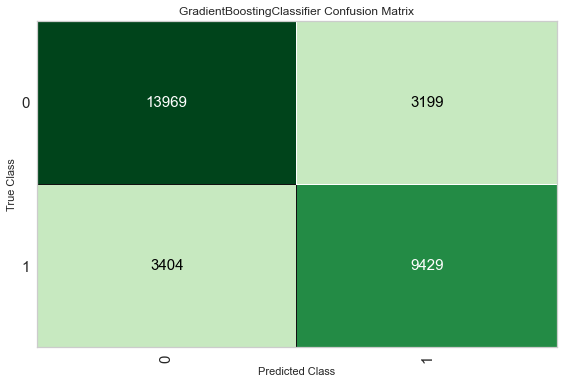

In [14]:
##show a confusion matrix for our models
plot_model(gbc_tune, plot = 'confusion_matrix')

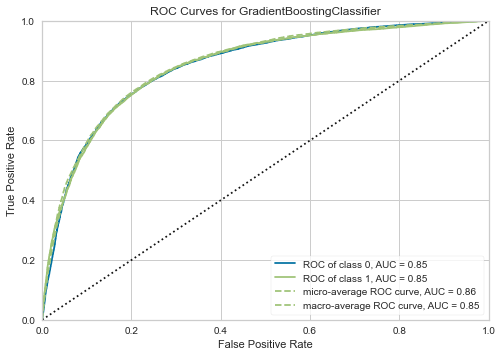

In [16]:
##graph out the auc curve
plot_model(gbc_tune, plot = 'auc')

In [18]:
predictions = predict_model(gbc_tune, data = df_test)
submission = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\sample_submission.csv')
submission['Survived'] = predictions['Label']
submission.to_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\high.csv',index=False)
predictions.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Label,Score
0,3,37448,10,19.0,0,0,63.01,25216,60.0,0,0.8283
1,3,58916,20,53.0,0,0,5.81,25216,60.0,1,0.7032
2,1,34253,20,19.0,0,0,38.91,8222,50.0,1,0.8747
3,2,45717,10,25.0,0,0,12.93,25216,60.0,0,0.6501
4,1,15261,20,17.0,0,2,26.89,10536,50.0,1,0.8140
